In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**TRAITEMENTS PRELIMINAIRES DES DONNEES**

In [44]:
df = pd.read_csv('dataverse_files/Avian_influenza_wildlife_surveillance_France_2016_to_2022.csv')
df.head()

,uid,ID,Results_of_analysis,Bird_species_FR,CD_nom,Bird_species_LAT,Bird_family_latin,Code_INSEE_municipality,Obs_date,Zone_of_enhanced_surveillance_ZRP,Name_ZRP,Nb_birds_lab_pools,X_Municipality_centroid_Lambert93,Y_Municipality_centroid_Lambert93
0,3887,44_20221116_B,HP,Goeland_argente,3302,Larus_argentatus,Laridae,44211,18/08/2022,Yes,DPM_DE_MESQUER_AU_CROISIC_ET_BAIE_DE_VILAINE,1.0,285931,6708326
1,3888,26_20220321_A,negative,Milan_royal,2846,Falco_milvus,Accipitridae,26064,20/01/2022,No,NaN,1.0,858600,6425700
2,3903,41_20180724_A,negative,Pelican_blanc,2460,Pelecanus_onocrotalus,Pelecanidae,41198,22/05/2018,No,NaN,1.0,574450,6684932
3,3901,31_20210304_A,negative,Pigeon_biset,3420,Columba_livia,Columbidae,31488,03/02/2021,No,NaN,1.0,578848,6286405
4,3892,07_20220518_A,negative,Pigeon_ramier,3424,Columba_palumbus,Columbidae,7349,29/03/2022,Yes,FLEUVE_ET_VALLEE_DU_RHONE,1.0,840540,6413065


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   uid                                4076 non-null   int64  
 1   ID                                 4076 non-null   object 
 2   Results_of_analysis                4076 non-null   object 
 3   Bird_species_FR                    4076 non-null   object 
 4   CD_nom                             4076 non-null   int64  
 5   Bird_species_LAT                   4076 non-null   object 
 6   Bird_family_latin                  4062 non-null   object 
 7   Code_INSEE_municipality            4076 non-null   object 
 8   Obs_date                           4076 non-null   object 
 9   Zone_of_enhanced_surveillance_ZRP  4076 non-null   object 
 10  Name_ZRP                           1901 non-null   object 
 11  Nb_birds_lab_pools                 4069 non-null   float

In [46]:
df.describe()

,uid,CD_nom,Nb_birds_lab_pools,X_Municipality_centroid_Lambert93,Y_Municipality_centroid_Lambert93
count,4076.000000,4076.000000,4069.000000,4.076000e+03,4.076000e+03
mean,2052.422964,37557.934985,1.517080,6.006043e+05,6.709835e+06
std,1202.335989,129386.864672,1.538115,2.428472e+05,2.376212e+05
min,1.000000,0.000000,1.000000,1.033080e+05,6.109485e+06
25%,1019.750000,2506.000000,1.000000,3.860240e+05,6.546843e+06
50%,2038.500000,2708.000000,1.000000,6.041950e+05,6.754640e+06
75%,3057.250000,3342.000000,1.000000,8.124670e+05,6.875424e+06
max,4770.000000,895998.000000,19.000000,1.236284e+06,7.108280e+06


In [47]:
# CHANGEMENT DE L'INDEX DU DATAFRAME

print(len(df['uid'].unique()))
print(df.index)

#On peut donc prendre la colonne 'uid' comme index

df = df.set_index('uid')

4076
RangeIndex(start=0, stop=4076, step=1)


In [48]:
# SUPPRESSION DES COLONNES INUTILES

df = df.drop('ID',axis=1)

In [49]:
# RENOMMAGE DES COLONNES

df.columns = ['Test_PCR_positif','Espece_nom_fr','Espece_ID','Espece_nom_latin','Famille_nom_latin','Commune_ID','Date_observation','ZRP','ZRP_Name','Nombre_oiseaux_analyses','X_localisation','Y_localisation']
# 'ZRP' = 'Zone à Risque Particulier', définies au niveau gouvernemental

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4076 entries, 3887 to 4625
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Test_PCR_positif         4076 non-null   object 
 1   Espece_nom_fr            4076 non-null   object 
 2   Espece_ID                4076 non-null   int64  
 3   Espece_nom_latin         4076 non-null   object 
 4   Famille_nom_latin        4062 non-null   object 
 5   Commune_ID               4076 non-null   object 
 6   Date_observation         4076 non-null   object 
 7   ZRP                      4076 non-null   object 
 8   ZRP_Name                 1901 non-null   object 
 9   Nombre_oiseaux_analyses  4069 non-null   float64
 10  X_localisation           4076 non-null   int64  
 11  Y_localisation           4076 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 414.0+ KB


In [50]:
df.head()

,Test_PCR_positif,Espece_nom_fr,Espece_ID,Espece_nom_latin,Famille_nom_latin,Commune_ID,Date_observation,ZRP,ZRP_Name,Nombre_oiseaux_analyses,X_localisation,Y_localisation
uid,,,,,,,,,,,,
3887,HP,Goeland_argente,3302,Larus_argentatus,Laridae,44211,18/08/2022,Yes,DPM_DE_MESQUER_AU_CROISIC_ET_BAIE_DE_VILAINE,1.0,285931,6708326
3888,negative,Milan_royal,2846,Falco_milvus,Accipitridae,26064,20/01/2022,No,NaN,1.0,858600,6425700
3903,negative,Pelican_blanc,2460,Pelecanus_onocrotalus,Pelecanidae,41198,22/05/2018,No,NaN,1.0,574450,6684932
3901,negative,Pigeon_biset,3420,Columba_livia,Columbidae,31488,03/02/2021,No,NaN,1.0,578848,6286405
3892,negative,Pigeon_ramier,3424,Columba_palumbus,Columbidae,7349,29/03/2022,Yes,FLEUVE_ET_VALLEE_DU_RHONE,1.0,840540,6413065


In [51]:
# AMELIORATION DU TYPE DE DONNEES CONTENUES DANS 'Test__PCR_positif' :

print(df['Test_PCR_positif'].unique())
print('Ancien type dans la colonne Test_PCR_positif :',df['Test_PCR_positif'].dtypes)

df['Test_PCR_positif'] = (df['Test_PCR_positif']=='HP')
print('Nouveau type dans la colonne Test_PCR_positif :',df['Test_PCR_positif'].dtypes)

['HP' 'negative']
Ancien type dans la colonne Test_PCR_positif : object
Nouveau type dans la colonne Test_PCR_positif : bool


In [52]:
# AMELIORATION DU TYPE DE DONNEES CONTENUES DANS 'ZRP' :

print(df['ZRP'].unique())
print('Ancien type dans la colonne ZRP :',df['ZRP'].dtypes)

df['ZRP'] = (df['ZRP']=='Yes')
print('Nouveau type dans la colonne ZRP :',df['ZRP'].dtypes)

['Yes' 'No']
Ancien type dans la colonne ZRP : object
Nouveau type dans la colonne ZRP : bool


In [53]:
# AMELIORATION DU TYPE DE DONNEES CONTENUES DANS 'Date_observation' :

print('Ancien type dans la colonne Date_observation :',df['Date_observation'].dtypes)

df['Date_observation'] = df['Date_observation'].astype('datetime64[ns]')

print('Nouveau type dans la colonne Date_observation :',df['Date_observation'].dtypes)


Ancien type dans la colonne Date_observation : object
Nouveau type dans la colonne Date_observation : datetime64[ns]


In [54]:
# AMELIORATION DU TYPE DE DONNEES CONTENUES DANS 'Nombre_oiseaux_analyses' :

# NE FONCTIONNE PAS A CAUSE DES NA !

#print('Ancien type dans la colonne Nombre_oiseaux_analyses :',df['Nombre_oiseaux_analyses'].dtypes)

#df['Nombre_oiseaux_analyses'] = df['Nombre_oiseaux_analyses'].astype(int)
#print('Nouveau type dans la colonne Nombre_oiseaux_analyses :',df['Nombre_oiseaux_analyses'].dtypes)

In [55]:
df.head()

,Test_PCR_positif,Espece_nom_fr,Espece_ID,Espece_nom_latin,Famille_nom_latin,Commune_ID,Date_observation,ZRP,ZRP_Name,Nombre_oiseaux_analyses,X_localisation,Y_localisation
uid,,,,,,,,,,,,
3887,True,Goeland_argente,3302,Larus_argentatus,Laridae,44211,2022-08-18,True,DPM_DE_MESQUER_AU_CROISIC_ET_BAIE_DE_VILAINE,1.0,285931,6708326
3888,False,Milan_royal,2846,Falco_milvus,Accipitridae,26064,2022-01-20,False,NaN,1.0,858600,6425700
3903,False,Pelican_blanc,2460,Pelecanus_onocrotalus,Pelecanidae,41198,2018-05-22,False,NaN,1.0,574450,6684932
3901,False,Pigeon_biset,3420,Columba_livia,Columbidae,31488,2021-03-02,False,NaN,1.0,578848,6286405
3892,False,Pigeon_ramier,3424,Columba_palumbus,Columbidae,7349,2022-03-29,True,FLEUVE_ET_VALLEE_DU_RHONE,1.0,840540,6413065


**REPRESENTATIONS GRAPHIQUES GENERALES**

Text(0, 0.5, 'Nombre de tests réalisés')

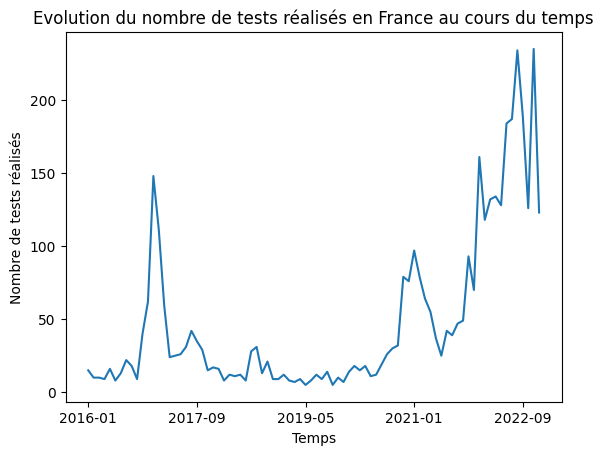

In [56]:
# ANALYSE DE LA FREQUENCE DES TESTS EFFECTUES SUR LES OISEAUX

df['A/M_observation'] = df['Date_observation'].dt.strftime('%Y-%m')
freq = df.groupby(by='A/M_observation')
freq.size().plot()
plt.title('Evolution du nombre de tests réalisés en France au cours du temps')
plt.xlabel('Temps')
plt.ylabel('Nombre de tests réalisés')

Est-ce que une épidémie implique une hausse du nb de test ? Sans doute

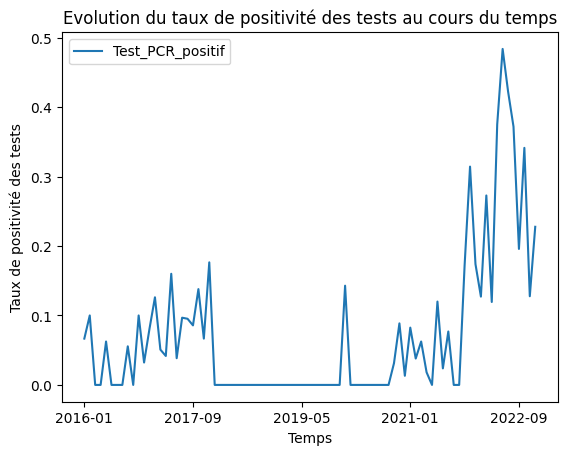

In [14]:
# PROPORTION DE TEST POSITIFS SELON LE TEMPS

chronologie = df.pivot_table(
    values='Test_PCR_positif',
    index='A/M_observation')

chronologie.plot()
plt.title('Evolution du taux de positivité des tests au cours du temps')
plt.xlabel('Temps')
plt.ylabel('Taux de positivité des tests')
plt.show()

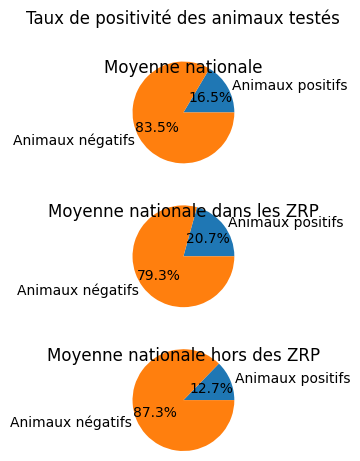

In [33]:
# INFLUENCE DES ZRP

Répartition = ['Animaux positifs','Animaux négatifs']

D1 = [df['Test_PCR_positif'].mean(),1-df['Test_PCR_positif'].mean()]

Influence_ZRP = df.pivot_table(
    values='Test_PCR_positif',
    index='ZRP')

D2 = [Influence_ZRP.iloc[1,0],1-Influence_ZRP.iloc[1,0]]
D3 = [Influence_ZRP.iloc[0,0],1-Influence_ZRP.iloc[0,0]]

fig, axs = plt.subplots(3,1)
fig.suptitle('Taux de positivité des animaux testés')
axs[0].pie(D1, labels=Répartition, autopct='%1.1f%%',radius=2)
axs[0].set_title('Moyenne nationale')
axs[1].pie(D2, labels=Répartition, autopct='%1.1f%%',radius=2)
axs[1].set_title('Moyenne nationale dans les ZRP')
axs[2].pie(D3, labels=Répartition, autopct='%1.1f%%',radius=2)
axs[2].set_title('Moyenne nationale hors des ZRP')
plt.tight_layout()


# Et pdt une pandémie ? Les observations sont elles modifiées ?

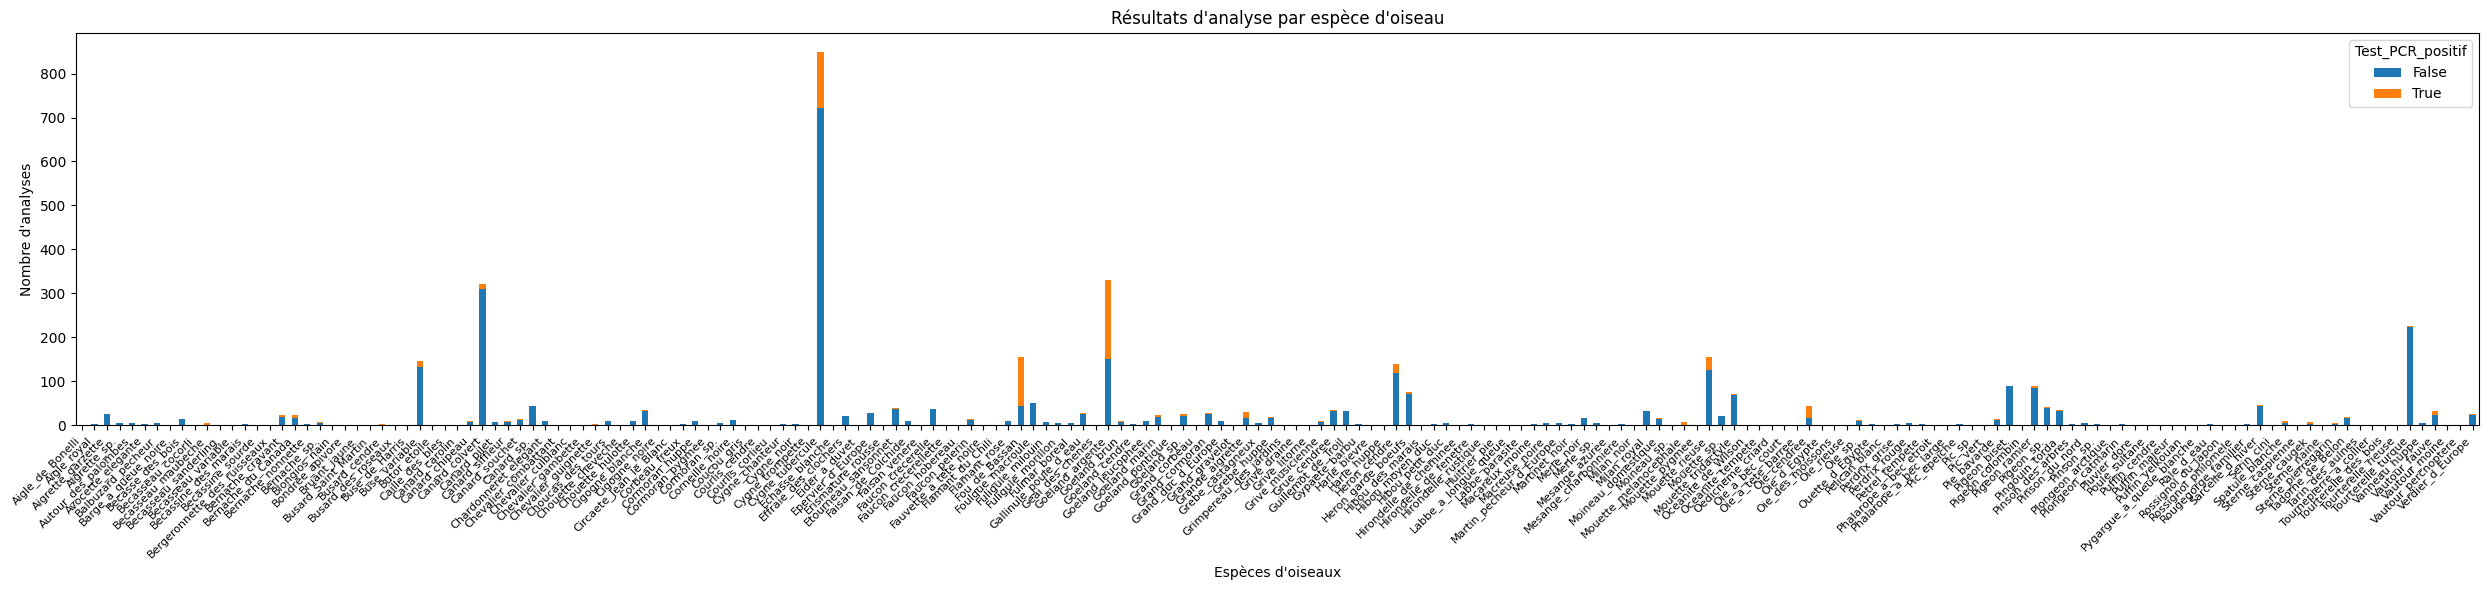

In [42]:
# AGREGATION DE DONNEES : RESULTAT D'ANALYSE PAR ESPECE D'OISEAU
#    IDEES ->>>> SUPPRIMER TOUTES LES BARRES DE HAUTEUR NEGLIGEABLE

bird_analysis_counts = df.groupby(['Espece_nom_fr', 'Test_PCR_positif']).size().unstack(fill_value=0)

bird_analysis_counts.plot(kind='bar', stacked=True, figsize=(25, 6))
plt.title("Résultats d'analyse par espèce d'oiseau")
plt.ylabel("Nombre d'analyses")
plt.xlabel("Espèces d'oiseaux")
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

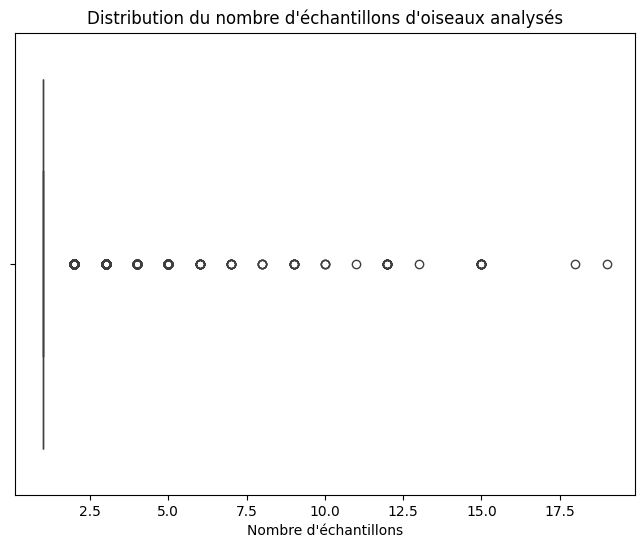

In [45]:
# VISUALISATION DE LA DISTRIBUTION DU NOMBRE D'ECHANTILLONS D'OISEAUX ANALYSES

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Nombre_oiseaux_analyses'])
plt.title("Distribution du nombre d'échantillons d'oiseaux analysés")
plt.xlabel("Nombre d'échantillons")
plt.show()

**REPARTITION GEOGRAPHIQUE DES EPIDEMIES**

In [52]:
df_bis = pd.read_csv('dataverse_files/Correspondance-code-insee-code-postal.csv',sep=';',encoding='latin-1')
df_bis.describe()

,Code INSEE,Code Postal,Commune,Département,Région
count,36742,36742,36742,36742,36742
unique,36742,6101,34130,101,27
top,33363,51300,SAINTE-COLOMBE,['PAS-DE-CALAIS'],['MIDI-PYRENEES']
freq,1,46,14,895,3020


In [54]:
df_merge = df.merge(df_bis[['Code INSEE','Code Postal','Département']].rename(columns={'Code Postal': 'Code_postal','Département': 'Departement'}),left_on="Commune_ID", right_on="Code INSEE").drop('Code INSEE', axis=1)

In [62]:
# REPARTITION GEOGRAPHIQUE DES TESTS REALISES SUR LES OISEAUX
(df_merge.groupby('Departement').size()*100/len(df_merge)).sort_values(ascending = False)

Departement
['LOIRE-ATLANTIQUE']    6.231600
['FINISTERE']           4.465162
['SOMME']               4.293425
['NORD']                3.925417
['MANCHE']              3.900883
                          ...   
['CORREZE']             0.147203
['TARN-ET-GARONNE']     0.147203
['HAUTE-LOIRE']         0.098135
['HAUTES-ALPES']        0.098135
['LOT']                 0.073602
Length: 95, dtype: float64

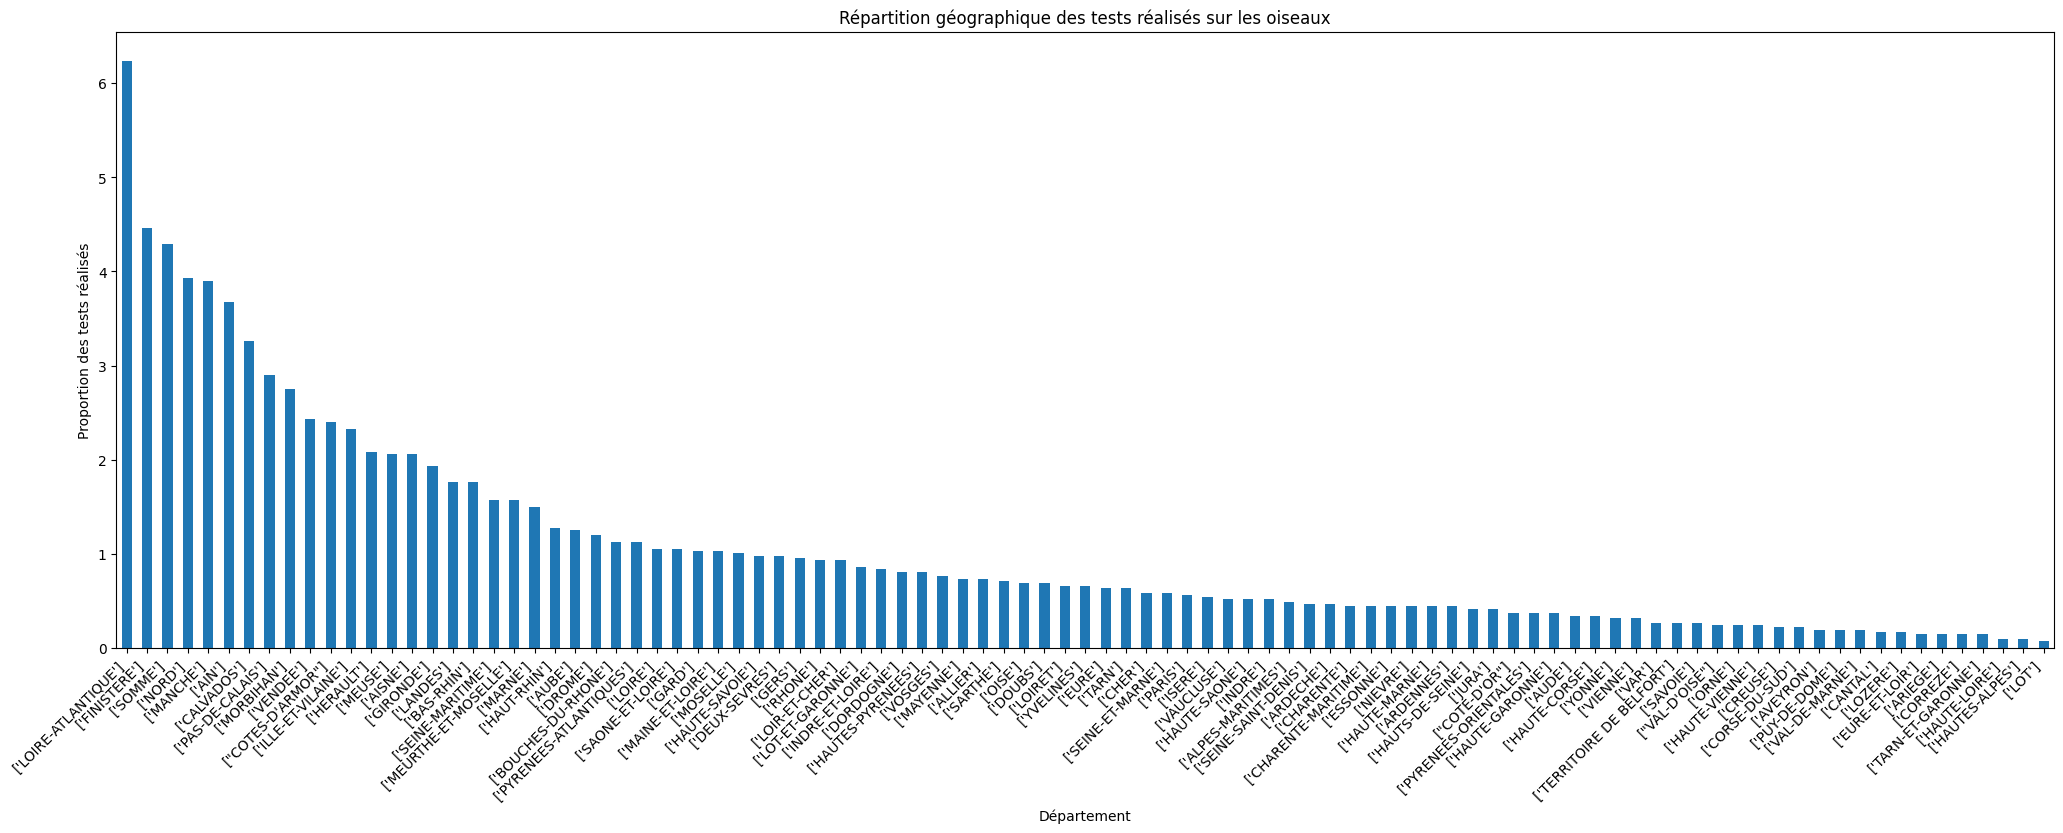

In [70]:
(df_merge.groupby('Departement').size()*100/len(df_merge)).sort_values(ascending = False).plot(kind='bar', stacked=True, figsize=(25, 8))
plt.title("Répartition géographique des tests réalisés sur les oiseaux")
plt.ylabel("Proportion des tests réalisés")
plt.xlabel("Département")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

In [80]:
# REPARTITION GEOGRAPHIQUE DES TESTS POSITIFS
g = df_merge.groupby('Departement')['Test_PCR_positif'].mean().sort_values(ascending = False)
g.head(15)

Departement
['AVEYRON']              0.500000
['CHARENTE-MARITIME']    0.444444
['CALVADOS']             0.428571
['SEINE-MARITIME']       0.421875
['SOMME']                0.405714
['MANCHE']               0.402516
['AIN']                  0.373333
['ALLIER']               0.333333
['LOZERE']               0.285714
['MEUSE']                0.285714
['HAUTE-MARNE']          0.277778
["COTES-D'ARMOR"]        0.275510
['PAS-DE-CALAIS']        0.237288
['LOIRE-ATLANTIQUE']     0.220472
['GERS']                 0.205128
Name: Test_PCR_positif, dtype: float64

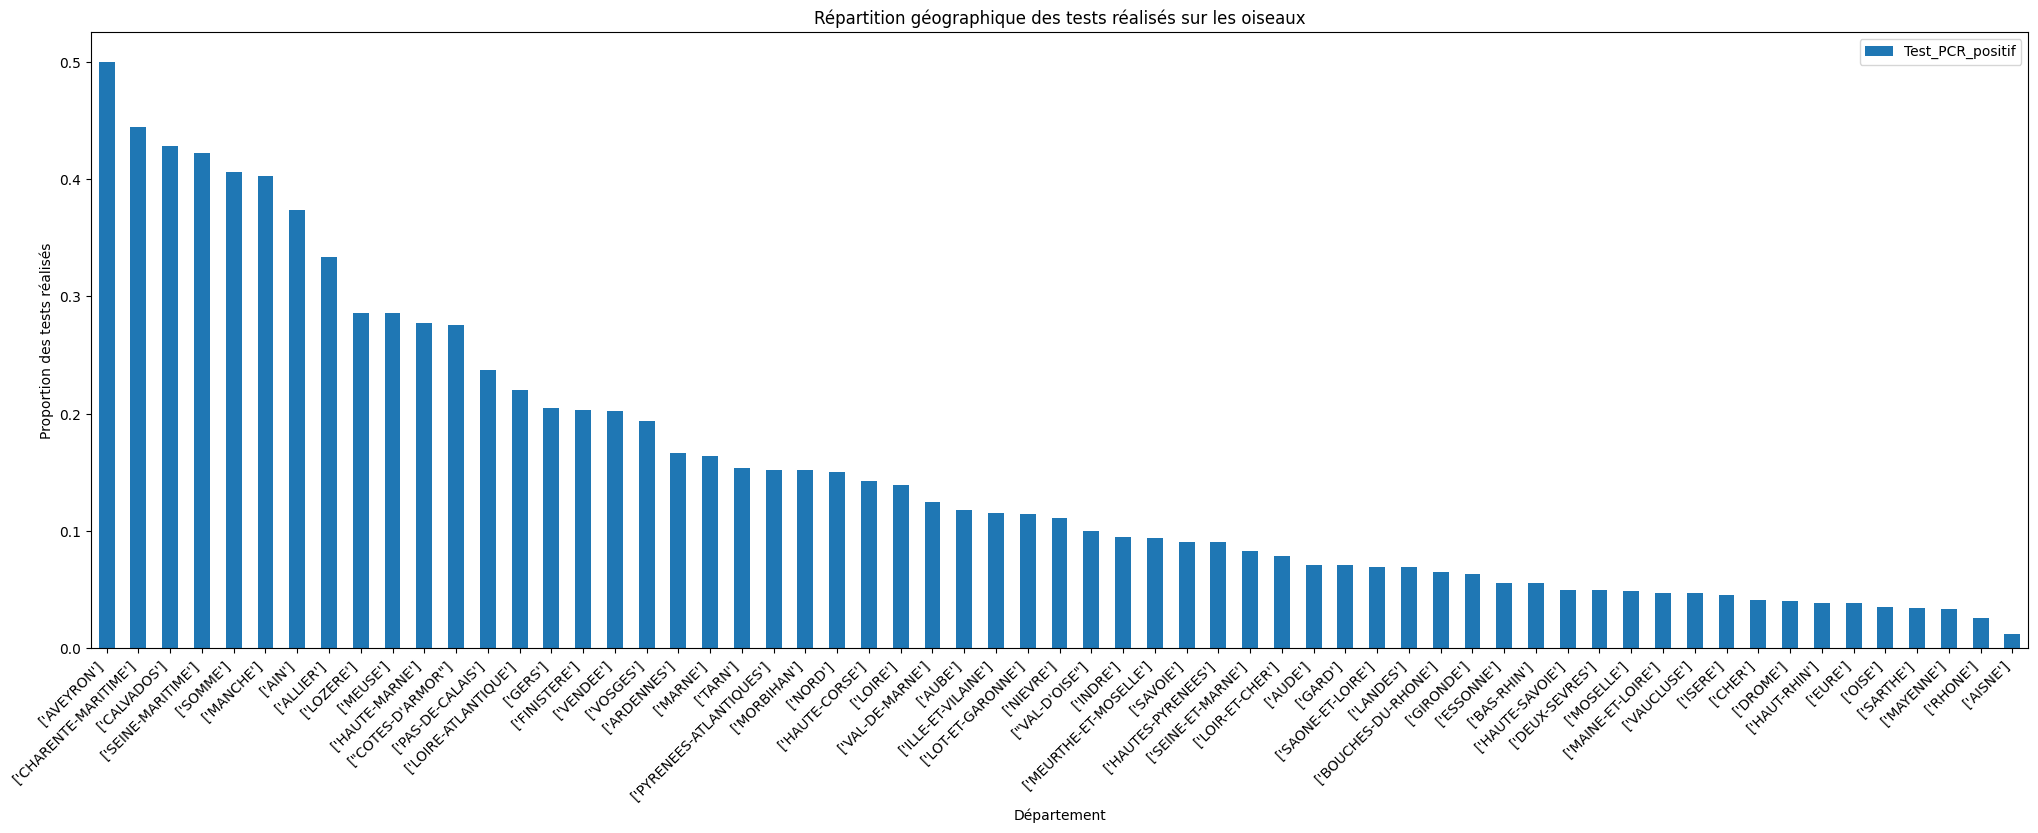

In [88]:
g_df = g.to_frame()
indices_a_supprimer = g_df[g_df['Test_PCR_positif'] == 0].index
g_df_sans_0 = g_df.drop(indices_a_supprimer)

g_df_sans_0.plot(kind='bar', stacked=True, figsize=(25, 8))
plt.title("Taux de positivité des tests selon le département")
plt.ylabel("Proportion des tests réalisés")
plt.xlabel("Département")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

**CARTES**

In [ ]:
# LISTE DES COORDONNEES GPS :

In [25]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature